In [6]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import imutils

In [44]:
def hsv_filter(image, lower = (60,35,140), upper = (180,255,255), show_plots = False):
    hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

    # Threshold of blue in HSV space
    lower_blue = np.array(lower)
    upper_blue = np.array(upper)
    # lower_blue = np.array([110,50,50])
    # upper_blue = np.array([130,255,255])

    # preparing the mask to overlay
    mask = cv2.inRange(hsv, lower_blue, upper_blue)
    # mask = cv.cvtColor(image.)

    # The black region in the mask has the value of 0,
    # so when multiplied with original image removes all non-blue regions
    result = cv2.bitwise_and(image, image, mask = mask)

    # mask = cv.cvtColor(image, cv.COLOR_BGR2GRAY)

    result = cv2.cvtColor(result, cv2.COLOR_BGR2RGB)
    # result = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
    # result = cv.cvtColor(image, cv.COLOR_BGR2RGB)

    # plt.subplot(311)
    if show_plots:
        plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
        plt.title("original image")
        plt.show()

        # plt.subplot(312)
        plt.imshow(mask, cmap="gray")
        plt.title("mask")
        plt.show()

        # plt.subplot(313)
        plt.imshow(result)
        plt.title("result")
        plt.show()
        
    return result, mask
    # cv.imshow('result',result)

In [7]:
def shi_tomashi(image):
    """
    Use Shi-Tomashi algorithm to detect corners
    Args:
        image: np.array
    Returns:
        corners: list
    """
    gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    corners = cv2.goodFeaturesToTrack(gray, 4, 0.01, 100)
    corners = np.int0(corners)
    corners = sorted(np.concatenate(corners).tolist())
    print('\nThe corner points are...\n')

    im = image.copy()
    for index, c in enumerate(corners):
        x, y = c
        cv2.circle(im, (x, y), 3, 255, -1)
        character = chr(65 + index)
        print(character, ':', c)
        cv2.putText(im, character, tuple(c), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 255), 2, cv2.LINE_AA)

    plt.imshow(im)
    plt.title('Corner Detection: Shi-Tomashi')
    plt.show()
    return corners

In [8]:
def order_points(pts):
    rect = np.zeros((4, 2), dtype="float32")

    s = pts.sum(axis=1)
    rect[0] = pts[np.argmin(s)]
    rect[2] = pts[np.argmax(s)]

    diff = np.diff(pts, axis=1)
    rect[1] = pts[np.argmin(diff)]
    rect[3] = pts[np.argmax(diff)]

    return rect


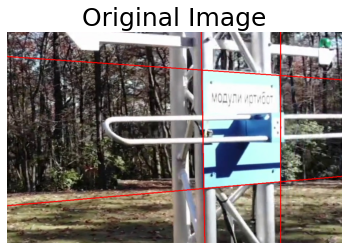

In [68]:


image = cv2.imread("frame_25.jpg")
image = image[300:-200, 900:-100, :]

gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
gray = cv2.GaussianBlur(gray, (5, 5), 0)

 
# Converting the image to hsv
hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
 
lower_blue = np.array([60,35,140])
upper_blue = np.array([190,255,255])
     
mask = cv2.inRange(hsv, lower_blue, upper_blue)
    
result = cv2.bitwise_and(image, image, mask = mask)

edges = cv2.Canny(result, 255/3, 255)

def lines():
    lines = cv2.HoughLines(edges, 1, np.pi/180, 60)
 #   myMinLine = []
    myMinVertLine = []
    myMaxVertLine = []
    myMinHorizLine = []
    myMaxHorizLine = []
    for r_theta in lines:
        arr = np.array(r_theta[0], dtype=np.float64)
        r, theta = arr

        a = np.cos(theta)
        b = np.sin(theta)

        x0 = a*r
        y0 = b*r
        x1 = int(x0 + 1000*(-b))
        y1 = int(y0 + 1000*(a))
        x2 = int(x0 - 1000*(-b))
        y2 = int(y0 - 1000*(a))
        if abs(x1-x2) < 300:
            if not myMinVertLine:
                myMinVertLine = [(x1, y1), (x2, y2)]
            elif x2+x1 < myMinVertLine[1][0]+myMinVertLine[0][0]:
                myMinVertLine = [(x1, y1), (x2, y2)]
            if not myMaxVertLine:
                myMaxVertLine = [(x1, y1), (x2, y2)]
            elif x2+x1 > myMaxVertLine[1][0]+myMaxVertLine[0][0]:
                myMaxVertLine = [(x1, y1), (x2, y2)]
        #slope = abs((y1-y2)/(x1-x2));
        elif abs(y1-y2) < 300:
            if not myMinHorizLine:
                myMinHorizLine = [(x1, y1), (x2, y2)]
            elif (y2+y1) < (myMinHorizLine[1][1]+myMinHorizLine[0][1]):
                myMinHorizLine = [(x1, y1), (x2, y2)]
            if not myMaxHorizLine:
#                 print("wtf")
                myMaxHorizLine = [(x1, y1), (x2, y2)]
            elif y2+y1 > myMaxHorizLine[1][1]+myMaxHorizLine[0][1]:
                myMaxHorizLine = [(x1, y1), (x2, y2)]
    
    cv2.line(image, myMinVertLine[0], myMinVertLine[1], (0, 0, 255), 2)
    cv2.line(image, myMaxVertLine[0], myMaxVertLine[1], (0, 0, 255), 2)
    cv2.line(image, myMinHorizLine[0], myMinHorizLine[1], (0, 0, 255), 2)
    cv2.line(image, myMaxHorizLine[0], myMaxHorizLine[1], (0, 0, 255), 2)


        
        
# def corners():
#     corners = cv2.goodFeaturesToTrack(edges, 400, 0.1, 10)

#     #print(corners)
#     for i in corners:
#         x, y = i.ravel()
#         cv2.circle(image, (x, y), 10, 255, -1)
# plt.imshow(image[:,:,::-1]);plt.title("Original Image",fontdict={'fontsize': 25});plt.axis('off');
# corners()
lines()
#plt.figure(figsize=[13,13])

#plt.subplot(141);
#plt.imshow(edged[:,:]);plt.title("Edged Image",fontdict={'fontsize': 25});plt.axis('off');
plt.imshow(image[:,:,::-1]);plt.title("Original Image",fontdict={'fontsize': 25});plt.axis('off');
#plt.subplot(142);
#plt.imshow(mask, cmap='gray');plt.title("Mask of blue Color",fontdict={'fontsize': 25});plt.axis('off');
#plt.subplot(143);
#plt.imshow(result[:,:,::-1]);plt.title("Result Image",fontdict={'fontsize': 25});plt.axis('off');
#plt.imshow(edges[:,:]);plt.title("Edged Image",fontdict={'fontsize': 25});plt.axis('off');


#plt.subplot(144),
#plt.imshow(edges,cmap = 'gray')



In [69]:
def drawLimitedLines(image, x, y):
    image = image[x-300:x+300, y-300:y+300]
    if image.shape[0] < 300 or image.shape[1] < 300:
        return False, image
   # plt.imshow(image[:,:,::-1]);plt.title("Original Image",fontdict={'fontsize': 25});plt.axis('off');
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    gray = cv2.GaussianBlur(gray, (5, 5), 0)


    # Converting the image to hsv
    hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

    lower_blue = np.array([60,35,140])
    upper_blue = np.array([190,255,255])

    mask = cv2.inRange(hsv, lower_blue, upper_blue)

    result = cv2.bitwise_and(image, image, mask = mask)

    edges = cv2.Canny(result, 255/3, 255)

    def lines():
        lines = cv2.HoughLines(edges, 1, np.pi/180, 60)
     #   myMinLine = []
        myMinVertLine = []
        myMaxVertLine = []
        myMinHorizLine = []
        myMaxHorizLine = []
        for r_theta in lines:
            arr = np.array(r_theta[0], dtype=np.float64)
            r, theta = arr

            a = np.cos(theta)
            b = np.sin(theta)

            x0 = a*r
            y0 = b*r
            x1 = int(x0 + 1000*(-b))
            y1 = int(y0 + 1000*(a))
            x2 = int(x0 - 1000*(-b))
            y2 = int(y0 - 1000*(a))
            if abs(x1-x2) < 300:
                if not myMinVertLine:
                    myMinVertLine = [(x1, y1), (x2, y2)]
                elif x2+x1 < myMinVertLine[1][0]+myMinVertLine[0][0]:
                    myMinVertLine = [(x1, y1), (x2, y2)]
                if not myMaxVertLine:
                    myMaxVertLine = [(x1, y1), (x2, y2)]
                elif x2+x1 > myMaxVertLine[1][0]+myMaxVertLine[0][0]:
                    myMaxVertLine = [(x1, y1), (x2, y2)]
            #slope = abs((y1-y2)/(x1-x2));
            elif abs(y1-y2) < 300:
                if not myMinHorizLine:
                    myMinHorizLine = [(x1, y1), (x2, y2)]
                elif (y2+y1) < (myMinHorizLine[1][1]+myMinHorizLine[0][1]):
                    myMinHorizLine = [(x1, y1), (x2, y2)]
                if not myMaxHorizLine:
    #                 print("wtf")
                    myMaxHorizLine = [(x1, y1), (x2, y2)]
                elif y2+y1 > myMaxHorizLine[1][1]+myMaxHorizLine[0][1]:
                    myMaxHorizLine = [(x1, y1), (x2, y2)]

        cv2.line(image, myMinVertLine[0], myMinVertLine[1], (0, 0, 255), 2)
        cv2.line(image, myMaxVertLine[0], myMaxVertLine[1], (0, 0, 255), 2)
        cv2.line(image, myMinHorizLine[0], myMinHorizLine[1], (0, 0, 255), 2)
        cv2.line(image, myMaxHorizLine[0], myMaxHorizLine[1], (0, 0, 255), 2)




    # def corners():
    #     corners = cv2.goodFeaturesToTrack(edges, 400, 0.1, 10)

    #     #print(corners)
    #     for i in corners:
    #         x, y = i.ravel()
    #         cv2.circle(image, (x, y), 10, 255, -1)
    # plt.imshow(image[:,:,::-1]);plt.title("Original Image",fontdict={'fontsize': 25});plt.axis('off');
    # corners()
    lines()
    return True, image
    #plt.figure(figsize=[13,13])

    #plt.subplot(141);
    #plt.imshow(edged[:,:]);plt.title("Edged Image",fontdict={'fontsize': 25});plt.axis('off');
#     plt.imshow(image[:,:,::-1]);plt.title("Original Image",fontdict={'fontsize': 25});plt.axis('off');

width =  1920.0
height =  1080.0


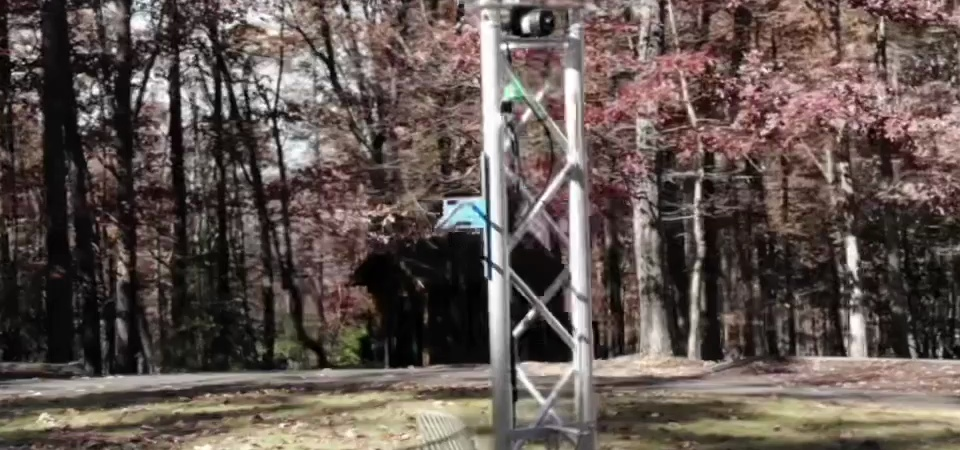

TypeError: 'NoneType' object is not subscriptable

In [67]:


#test video
from IPython.display import display, Image
import time

cap = cv2.VideoCapture('test1Video.mp4')
width = cap.get(cv2.CAP_PROP_FRAME_WIDTH)
height = cap.get(cv2.CAP_PROP_FRAME_HEIGHT)
print('width = ', width)
print('height = ', height)
display_handle=display(None, display_id=True)
while(cap.isOpened()):
    ret, frame = cap.read()
#     frame = draw_polygon_on_frame(frame)
#     frame = cv.GaussianBlur(frame,(5,5),0)

    #crop out sky
    frame = frame[int(height/3):int(3*height/4), int(width/4):int(3*width/4)]
    frameCopy = frame.copy()
    #filter to only take in blue
#     color_filtered, mask= hsv_filter(frame, lower = (77,35,140), upper = (130,255,255))
#     color_filtered = cv.cvtColor(frame,cv.COLOR_BGR2RGB)
    color_filtered, mask= hsv_filter(frame, lower = (77,35,140), upper = (130,255,255))
    color_filtered = cv2.cvtColor(frame,cv2.COLOR_BGR2RGB)
    
    # calculate x,y coordinate of center
    M = cv2.moments(mask)
    
    cX = int(M["m10"] / M["m00"])
    cY = int(M["m01"] / M["m00"])
    results = drawLimitedLines(frameCopy, cX, cY)
    if results[0]:
        print("what")
        frame = drawLimitedLines(frameCopy, cX, cY)
    # calculate x,y coordinate of center
#     M = cv.moments(mask)
    
#     cX = int(M["m10"] / M["m00"])
#     cY = int(M["m01"] / M["m00"])

#     cv.circle(frame, (cX, cY), 5, (0, 0, 255), -1)
    
#     corners = shi_tomasi(frame)
#     pts = np.array(corners)
#     pts = pts.reshape((-1,1,2))
    # print(pts)
#     cv.polylines(frame,[pts],True,(0,0,255),10)
#     drawLimitedLines(frame)
    _, frame = cv2.imencode('.jpeg', frame)
    display_handle.update(Image(data=frame.tobytes()))
#     time.sleep(.05)
cap.release()
display_handle.update(None)



In [ ]:
# #testing w video
# from matplotlib.backends.backend_agg import FigureCanvasAgg as FigureCanvas

# cap = cv.VideoCapture('test1.mp4')
# frame_width = cap.get(3)
# frame_height = cap.get(4)

# video = cv.VideoWriter('output_test.avi',cv.VideoWriter_fourcc('M','J','P','G'), 10, 
#                        (frame_width,frame_height))

# img = []
# frames = []

# while(cap.isOpened()):
#     ret, frame = cap.read()
#     gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    
#     fig = plt.figure()
#     plt.imshow(img[i], cmap=cm.Greys_r)

#     # put pixel buffer in numpy array
#     canvas = FigureCanvas(fig)
#     canvas.draw()
#     mat = np.array(canvas.renderer._renderer)
#     mat = cv2.cvtColor(mat, cv2.COLOR_RGB2BGR)

#     # write frame to video
#     video.write(mat)

# cap.release()